<a href="https://colab.research.google.com/github/Izabella-g-santos/AulaFCE/blob/main/Exemplo_08_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
from scipy.integrate import solve_ivp #integra a EDO
import matplotlib.pyplot as plt
from dataclasses import dataclass


In [31]:
@dataclass
class ParametrosAquecimento:
  T0 : float = 25.0 #temperatura inicial
  Q: float = 5000.0
  U: float = 150.0
  A: float = 5.0
  Tamb: float = 25.0
  m: float = 50.0
  cp: float = 1670.0

def modelo_aquecimento(t, T, params):
  Q, U, A, Tamb, m, cp = params.Q, params.U, params.A, params.Tamb, params.m, params.cp

  dTdt = (Q - U*A*(T-Tamb))/(m*cp)

  return dTdt

def simula_aquecimento(tempo,params):
  T0 = params.T0
  teval = np.linspace(tempo[0], tempo[-1], 100)
  sol = solve_ivp(modelo_aquecimento, tempo, [T0], t_eval=teval, method='BDF', args=(params,))
  return sol.t, sol.y[0]

Q = 5000.0, m = 50.0
ParametrosAquecimento(T0=25.0, Q=5000.0, U=150.0, A=5.0, Tamb=25.0, m=50.0, cp=1670.0)
Q = 7500, m = 50.0
ParametrosAquecimento(T0=25.0, Q=7500, U=150.0, A=5.0, Tamb=25.0, m=50.0, cp=1670.0)
Q = 5000.0, m = 200
ParametrosAquecimento(T0=25.0, Q=5000.0, U=150.0, A=5.0, Tamb=25.0, m=200, cp=1670.0)


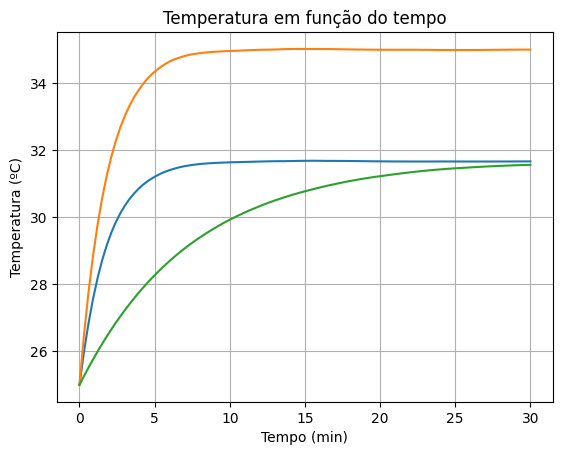

In [39]:
conjunto = [ParametrosAquecimento(),
            ParametrosAquecimento(Q = 7500),
            ParametrosAquecimento(m = 200)]
tempo = [0, 30*60] #usando o tempo em segundos (s)
for params in conjunto:
  t, T = simula_aquecimento(tempo, params)
  Q= params.Q
  m = params.m
  Tamb = params.Tamb
  print(f"Q = {Q}, m = {m}")
  print(params)
  plt.plot(t/60, T, label = f"Q = {Q}, m = {m}, cp = {cp}, Tamb ={Tamb}")

plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (ºC)')
plt.title('Temperatura em função do tempo')
plt.grid()
plt.show()

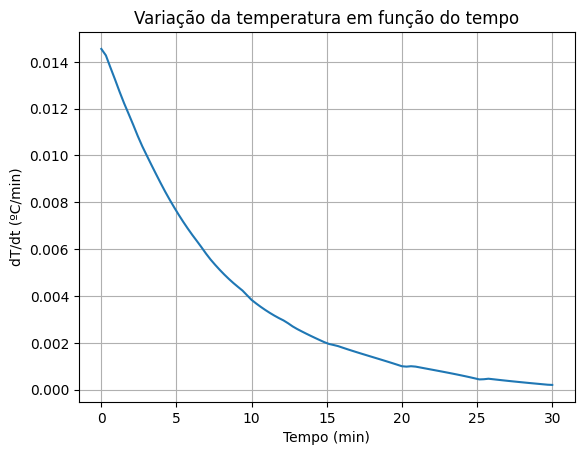

In [40]:
dTdt = np.gradient(T, t)

plt.plot(t/60, dTdt)
plt.xlabel('Tempo (min)')
plt.ylabel('dT/dt (ºC/min)')
plt.title('Variação da temperatura em função do tempo')
plt.grid()
plt.show()

In [45]:
dTdt = np.gradient(T, t)

import pandas as pd
resultado = pd.DataFrame({'Tempo (min)': t/60, 'Temperatura (ºC)': T, 'dT/dt (ºC/min)': dTdt})
resultado.to_csv('resultado.csv', index=False)
print(resultado)

    Tempo (min)  Temperatura (ºC)  dT/dt (ºC/min)
0      0.000000         25.000000        0.014550
1      0.303030         25.264538        0.014274
2      0.606061         25.519050        0.013755
3      0.909091         25.764724        0.013250
4      1.212121         26.000857        0.012725
..          ...               ...             ...
95    28.787879         31.546740        0.000268
96    29.090909         31.551446        0.000250
97    29.393939         31.555823        0.000232
98    29.696970         31.559875        0.000214
99    30.000000         31.563603        0.000205

[100 rows x 3 columns]


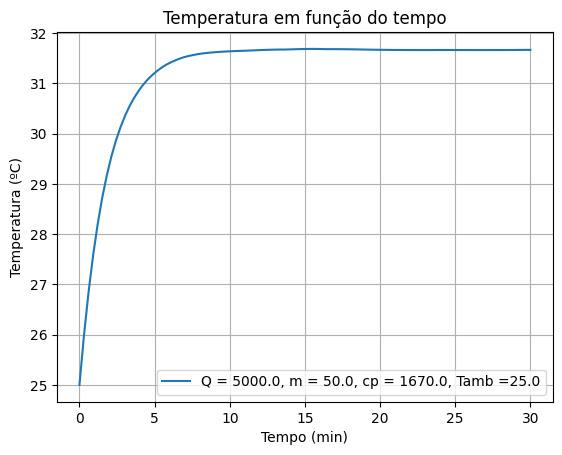

In [34]:
Q = params.Q
m = params.m
cp = params.cp
Tamb = params.Tamb

plt.plot(t/60, T, label = f"Q = {Q}, m = {m}, cp = {cp}, Tamb ={Tamb}")
plt.legend()
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (ºC)')
plt.title('Temperatura em função do tempo')
plt.grid()
plt.show()
